In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from Utilities.ExpModels import  GaussianModel

model = GaussianModel(3,-20,20, 432) 

In [2]:
with open('estimated_probabilities.pickle', 'rb') as f:
     (mu_values,estimated_probabilities)  = pickle.load(f)

#--------Run Evaluation -----------------------------------------------------------------------#
(probabilities,classifiers_test_scores) = estimated_probabilities
classifiers_test_scores = np.swapaxes(classifiers_test_scores,0,1)

kD_POLY =np.load('POLY_klDivergence.npy')
kD_SPOLY =np.load('Standardized_POLY_klDivergence.npy')

kD_RBF =np.load('RBF_klDivergence.npy')
kD_SRBF =np.load('Standardized_RBF_klDivergence.npy')

In [3]:
classifiers_test_scores.shape
#POLY
#RBF
#S_POLY
#S_RBF

(4, 100)

In [4]:
delta = kD_RBF -kD_POLY

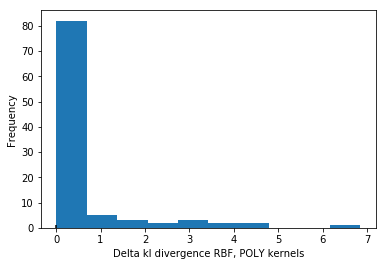

In [14]:
plt.clf()
fig =plt.figure()
ax =fig.add_subplot(111)
#density = gaussian_kde(delta)
#xs = np.linspace(-2,2,50)
#ax.plot(xs,density(xs))
ax.hist(kD_SRBF)
#ax.plot(np.linspace(-6,6,100),classifiers_test_scores[0],label ='POLY')
#ax.plot(np.linspace(-6,6,100),classifiers_test_scores[1],label='RBF')


ax.vlines(0,0,1)
ax.set_xlabel('Delta kl divergence RBF, POLY kernels')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig('POLY_kD.pdf')

In [28]:
#Observation:
#Standardization has no effect for poly, exact same kl divergence approximated.
#Standardization for rbf very slightly worse kl divergence
#Poly wins.
#Best performer: Poly degree 2 kernel
#Plot the avg kl divergence 

In [32]:
np.mean(kD_POLY)

0.074111072969183345

In [34]:
A=(kD_POLY -np.mean(kD_POLY))

In [35]:
np.argmin(A)

2

In [6]:
(generatingParameters,obsData) = np.load('ObservedData.npy')
obsData.shape

(100, 1)

In [7]:
obsData =np.abs(obsData)

In [8]:
np.argmin(obsData)

69

In [9]:
obsData[69]

array([ 0.13966503])

In [10]:
kD_POLY[69]

0.010901286732881772

In [11]:
kD_RBF[69]

0.0084089251546434433

In [12]:
# StandRBF vs RBF 
# RBF vs POLY 
# SHOW accuracies for RBF and poly are nearly identical across mu values.

#Hist POLY 
#True posterior plots poly,rbf at obs data = 0

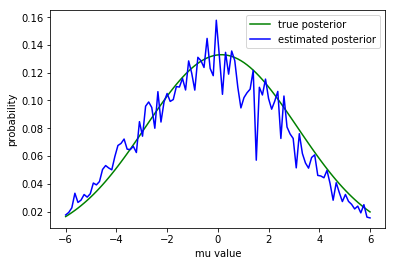

In [17]:
observedData = obsData[69]
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(mu_values,model.truePosterior(mu_values,observedData),'g-')
line2, = ax.plot(mu_values,probabilities[69,1],'b-')
ax.legend((line1,line2),('true posterior','estimated posterior'))
ax.set_xlabel('mu value')
ax.set_ylabel('probability')
plt.show()
fig.savefig('RBFpost.pdf')

In [16]:
with open('Standardized_POLY_parametersAndRegScales.pickle', 'rb') as f:
     choice  = pickle.load(f)

In [17]:
choice

[(2, array([  1.00000000e+01,   5.27263158e+03,   1.05352632e+04,
           1.57978947e+04,   2.10605263e+04,   2.63231579e+04,
           3.15857895e+04,   3.68484211e+04,   4.21110526e+04,
           4.73736842e+04,   5.26363158e+04,   5.78989474e+04,
           6.31615789e+04,   6.84242105e+04,   7.36868421e+04,
           7.89494737e+04,   8.42121053e+04,   8.94747368e+04,
           9.47373684e+04,   1.00000000e+05]))]